## Speed Up Training
Batch_train 可以有多种途径
- SGD: Stochastic Gradient Descent
    SGD将Data拆分成小批数据不断放入NN中进行计算。
    但是SGD是最基础的加速方法，也是众多方法中最慢的
- Momentum
![](https://static.mofanpy.com/results/ML-intro/speedup5.png)
- AdaGrad
![](https://static.mofanpy.com/results/ML-intro/speedup6.png)
- RMSProp
- Adam

In [10]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [11]:
LR = 0.01
BATCH_SIZE=32
EPOCH=12

## Vitual Data

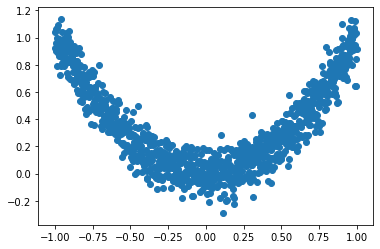

In [12]:
x=torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y=x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

plt.scatter(x.numpy(),y.numpy());

## Put dataset into torch dataset

In [13]:
torch_dataset=Data.TensorDataset(x,y)
loader=Data.DataLoader(dataset=torch_dataset,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        num_workers=2,)

## Default Network

In [14]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)

    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


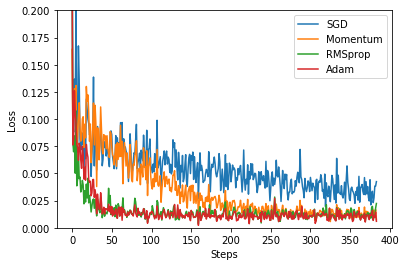

In [15]:
if __name__=='__main__':
    #different nets
    net_SGD         =Net(1,20,1)
    net_Momentum    =Net(1,20,1)
    net_RMSprop     =Net(1,20,1)
    net_Adam        =Net(1,20,1)

    nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]

    ##different optimizers
    opt_SGD         =  torch.optim.SGD(net_SGD.parameters(),lr=LR)
    opt_Momentum    =  torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
    opt_RMSprop     =  torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
    opt_Adam        =  torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

    loss_func=torch.nn.MSELoss()
    losses_his=[[],[],[],[]]

    for epoch in range(EPOCH):
        print('Epoch: ', epoch)
        for step,(batch_x,batch_y) in enumerate(loader):
            for net, opt, l_his in zip(nets,optimizers,losses_his):
                output=net(batch_x)
                loss=loss_func(output,batch_y)
                opt.zero_grad()
                loss.backward()
                opt.step()
                l_his.append(loss.data.numpy())

    labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
    plt.legend(loc='best')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.ylim((0, 0.2))
    plt.show()